# Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## Load data

In [3]:
sal= pd.read_pickle("C:/Users/ahria/Desktop/DATA_5100/ps_casts_DF.p")

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6069599 entries, 0 to 6262046
Data columns (total 17 columns):
 #   Column        Dtype              
---  ------        -----              
 0   cid           float64            
 1   lon           float64            
 2   lat           float64            
 3   time          object             
 4   datetime      datetime64[ns, UTC]
 5   date_ordinal  int64              
 6   decade        category           
 7   year          int32              
 8   season        object             
 9   month         int32              
 10  yearday       int32              
 11  z             float64            
 12  var           object             
 13  val           float64            
 14  ix            int64              
 15  iy            int64              
 16  h             float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(6), int32(3), int64(3), object(3)
memory usage: 723.6+ MB


## Reduce dataset to columns of interest, reduce to time range and the correct months (June to September)

In [5]:
new_df = sal[['lon','lat','time', 'datetime', 'decade', 'year','month','yearday','val']]

In [6]:
new_df= new_df[new_df['year'] >= 2015]
new_df = new_df[(new_df['month'] >= 6) & (new_df['month'] <= 9)]

In [7]:
new_df

,lon,lat,time,datetime,decade,year,month,yearday,val
1168996,-122.916702,47.091671,2015-06-04 16:27:44,2015-06-04 16:27:44+00:00,2010,2015,6,155,9.799500
1168997,-122.708298,47.276669,2015-06-04 18:35:44,2015-06-04 18:35:44+00:00,2010,2015,6,155,11.278800
1168998,-122.708298,47.276669,2015-06-04 18:35:44,2015-06-04 18:35:44+00:00,2010,2015,6,155,8.879900
1168999,-122.708298,47.276669,2015-06-04 18:35:44,2015-06-04 18:35:44+00:00,2010,2015,6,155,7.574800
1169000,-122.843300,47.264999,2015-06-04 19:48:16,2015-06-04 19:48:16+00:00,2010,2015,6,155,12.301601
...,...,...,...,...,...,...,...,...,...
6253547,-122.428001,47.744000,2023-09-18 18:02:00+00:00,2023-09-18 18:02:00+00:00,2020,2023,9,261,13.032093
6253548,-122.428001,47.744000,2023-09-18 18:03:00+00:00,2023-09-18 18:03:00+00:00,2020,2023,9,261,13.497872
6253549,-122.428001,47.744000,2023-09-18 18:04:00+00:00,2023-09-18 18:04:00+00:00,2020,2023,9,261,13.636691
6253550,-122.428001,47.744000,2023-09-18 18:06:00+00:00,2023-09-18 18:06:00+00:00,2020,2023,9,261,13.706288


## narrow into range of area

In [8]:
tester = sal[['lon','lat']]
reduced= tester[tester['lat'] >= 47.7]
#tester.to_csv('lon_lat.csv', index=False)

In [9]:
reduced

,lon,lat
0,-122.634599,47.934814
1,-122.634599,47.934814
2,-122.634599,47.934814
3,-122.634599,47.934814
4,-122.634599,47.934814
...,...,...
6262042,-122.550000,48.240000
6262043,-122.550000,48.240000
6262044,-122.550000,48.240000
6262045,-122.550000,48.240000


In [10]:
unique_pairs_df = tester[['lon', 'lat']].drop_duplicates()

# Get the number of unique pairs
num_unique_pairs = len(unique_pairs_df)

print("\nUnique pairs:")
print(unique_pairs_df)

print(f"\nNumber of unique pairs: {num_unique_pairs}")


Unique pairs:
                lon        lat
0       -122.634599  47.934814
13      -122.687959  48.136490
30      -122.477919  47.899817
42      -122.354581  47.894818
49      -122.459581  47.816485
...             ...        ...
2168891 -122.508560  48.372020
2176362 -122.347920  47.606493
2180469 -122.417922  47.626492
2865659 -122.365000  47.596900
2900149 -122.296435  47.511080

[1025 rows x 2 columns]

Number of unique pairs: 1025


rough locations of some lat lon:

-122.550000 	48.24000 is near ebey
-123.008301 	47.53833 is near hamma hamma


-122 seems to be the col we are mostly in and the thing that changes is the 40 or lat
47.5 seems to be around Renton or Hamma Hamma

i think we can safely drop any with lat BELOW 47.5

In [11]:
unique_pairs_df

,lon,lat
0,-122.634599,47.934814
13,-122.687959,48.136490
30,-122.477919,47.899817
42,-122.354581,47.894818
49,-122.459581,47.816485
...,...,...
2168891,-122.508560,48.372020
2176362,-122.347920,47.606493
2180469,-122.417922,47.626492
2865659,-122.365000,47.596900


## output a csv of unique lon and lat pairs to correlate with the kelp bed coordinates

In [13]:
new_df.to_csv('lon_lat.csv', index=False)

In [174]:
nb17

,geometry,bed_name,date,acres_17,county,Location,observations,water_temp_17,year,month
51,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-07-22,17.121355,Jefferson,North Beach Main,"heron on kelp mat, kelp crabs on kelp on nears...",11.0,2017,7
52,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-06-24,10.865711,Jefferson,North Beach Main,We saw kelp at different stages of maturity; s...,10.0,2017,6
61,Geocortex.Gis.Geometries.Polygon,North Beach East,2017-09-04,16.558031,Jefferson,North Beach Main,NaN,NaN,2017,9


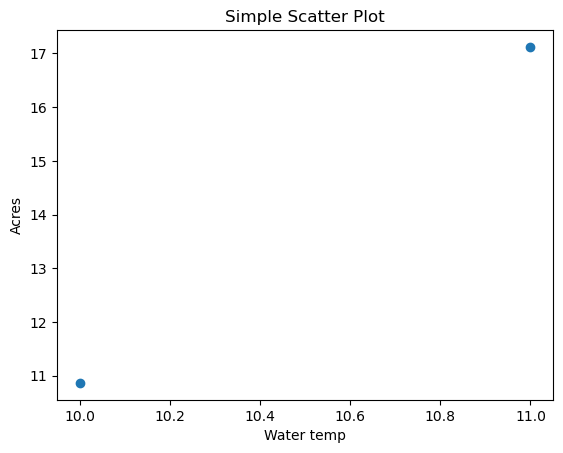

In [175]:
plt.scatter(nb17['water_temp_17'], nb17['acres_17'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

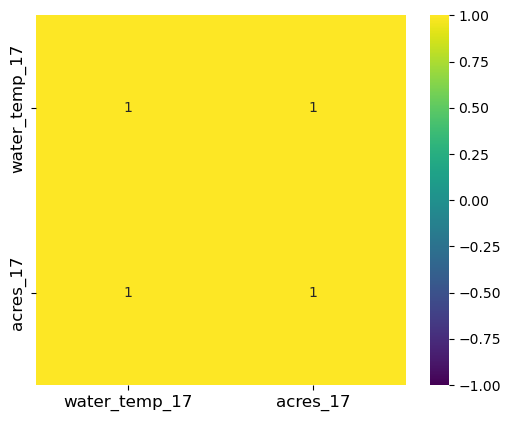

In [176]:
predictor_variables = ['water_temp_17']

numerical_predictors = nb17[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb17[numerical_predictors + ["acres_17"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

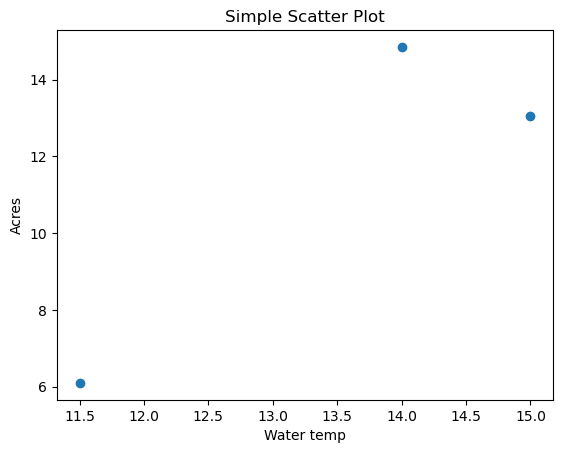

In [178]:
plt.scatter(nb20['water_temp_20'], nb20['acres_20'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

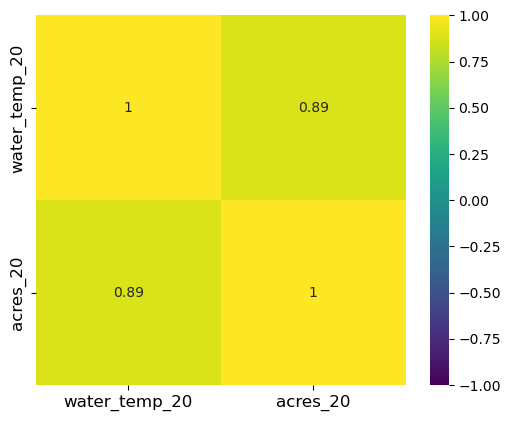

In [179]:
predictor_variables = ['water_temp_20']

numerical_predictors = nb20[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb20[numerical_predictors + ["acres_20"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

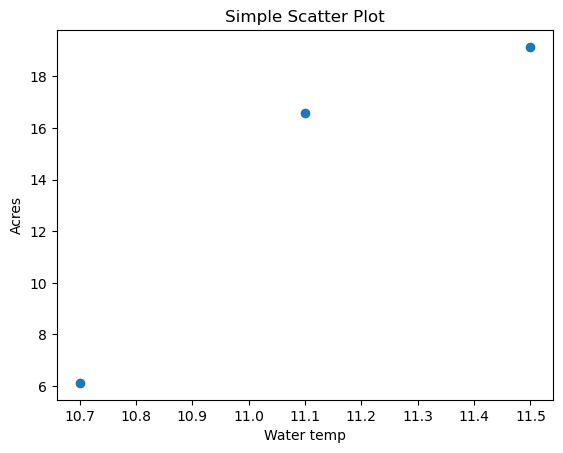

In [182]:
plt.scatter(nb22['water_temp_22'], nb22['acres_22'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

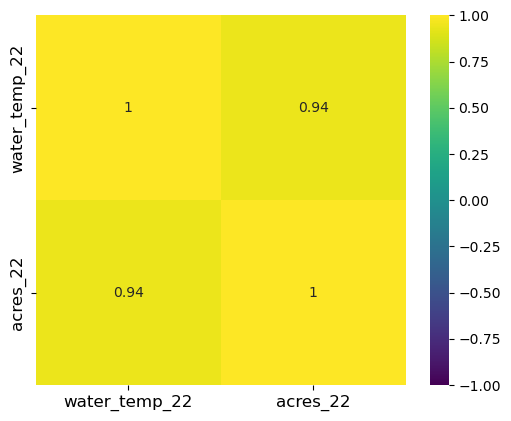

In [183]:
predictor_variables = ['water_temp_22']

numerical_predictors = nb22[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb22[numerical_predictors + ["acres_22"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

In [184]:
nb23

,geometry,bed_name,date,acres_23,county,Location,observations,Notes,water_temp_23,year,month
15,Geocortex.Gis.Geometries.Polygon,North Beach East,2023-08-12,18.188146,Jefferson,North Beach Main,STRONG currents - measurements may not match G...,NaN,11.8,2023,8
16,Geocortex.Gis.Geometries.Polygon,North Beach East,2023-07-15,13.823246,Jefferson,North Beach Main,Other species present: eelgrass interspersed a...,NaN,7.6,2023,7


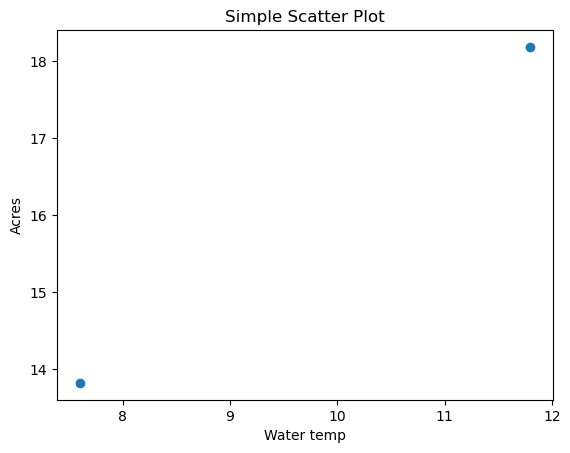

In [185]:
plt.scatter(nb23['water_temp_23'], nb23['acres_23'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

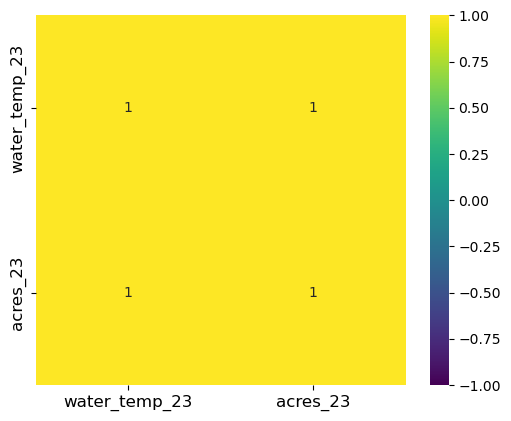

In [186]:
predictor_variables = ['water_temp_23']

numerical_predictors = nb23[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = nb23[numerical_predictors + ["acres_23"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

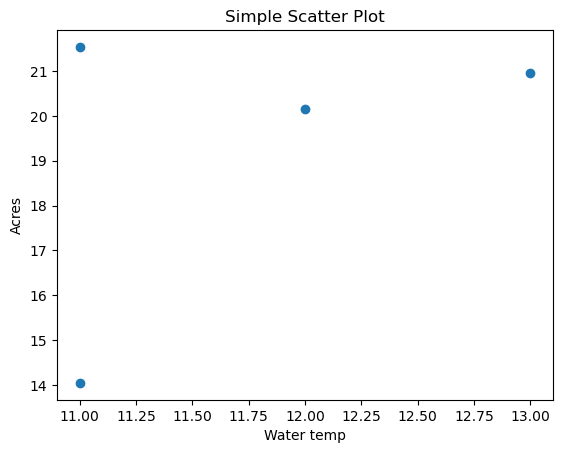

In [132]:
plt.scatter(ebey17['water_temp_17'], ebey17['acres_17'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

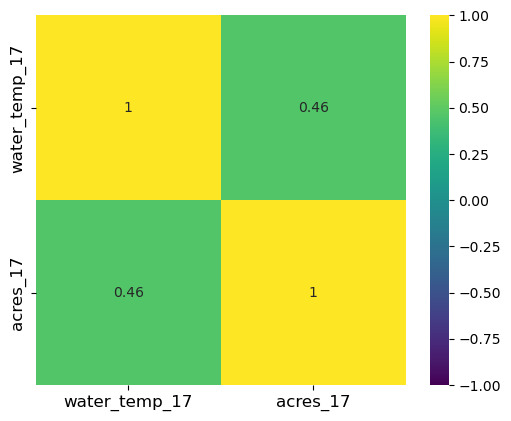

In [133]:
predictor_variables = ['water_temp_17']

numerical_predictors = ebey17[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey17[numerical_predictors + ["acres_17"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

In [147]:
ebey20

,geometry,bed_name,date,acres_20,county,Location,observations,water_temp_20,year,month
6,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-06-18,17.912362,Island,Ebey's Landing,Many tiny jumping fish\nFew schools of tiny (<...,11.8,2020,6
8,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-07-18,32.672965,Island,Ebey's Landing,NaN,11.5,2020,7
9,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2020-08-30,39.992646,Island,Ebey's Landing,NaN,11.9,2020,8


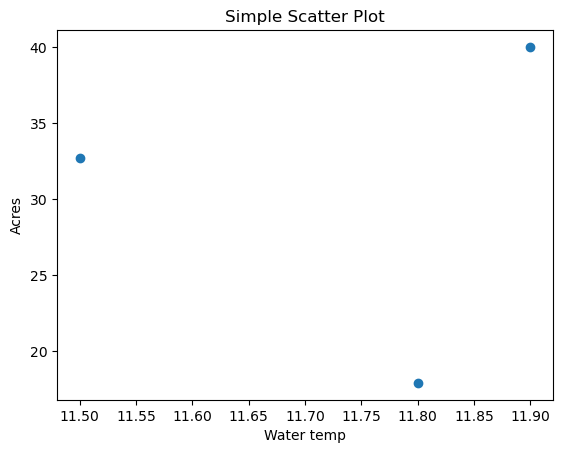

In [134]:
plt.scatter(ebey20['water_temp_20'], ebey20['acres_20'])

# Add labels and title
plt.xlabel("Water temp")
plt.ylabel("Acres")
plt.title("Simple Scatter Plot")

# Display the plot
plt.show()

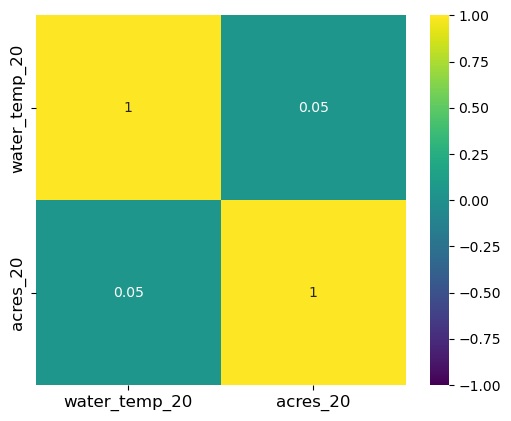

In [135]:
predictor_variables = ['water_temp_20']

numerical_predictors = ebey20[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = ebey20[numerical_predictors + ["acres_20"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()